In [21]:
from quant_met import plotting, hamiltonians, minimize_free_energy, utils
import numpy as np
import time
import matplotlib.pyplot as plt
import pandas as pd

In [15]:
lattice_constant = np.sqrt(3)

all_K_points = 4 * np.pi / (3 * lattice_constant) * np.array([
    (np.sin(i * np.pi / 6), np.cos(i * np.pi / 6)) for i in [1, 3, 5, 7, 9, 11]]
)

Gamma = np.array([0, 0])
M = np.pi / lattice_constant * np.array([1, 1 / np.sqrt(3)])
K = 4 * np.pi / (3 * lattice_constant) * np.array([1, 0])

points = [(M, 'M'), (Gamma, r'\Gamma'), (all_K_points[1], 'K')]

band_path, band_path_plot, ticks, labels = plotting.generate_bz_path(points, number_of_points=1000)

#BZ_path_plot = plotting.scatter_into_bz(all_K_points, band_path)

graphene_h = hamiltonians.GrapheneHamiltonian(t_nn=1, a=lattice_constant, mu=0, coulomb_gr=0)

band_structure = graphene_h.calculate_bandstructure(band_path)

BZ_grid = utils.generate_uniform_grid(8, 8, all_K_points[1], all_K_points[5], origin=np.array([0, 0]))

In [22]:
gap_size_vs_U = pd.DataFrame()

In [44]:
U_range = np.linspace(start=0.1, stop=6, num=10)

gap_size_vs_U['U'] = U_range

for mu in [0, 0.5, 1, 1.5, 2]:
    delta_over_U = []
    beta = 1000

    for i, U in enumerate(U_range):
        graphene_h = hamiltonians.GrapheneHamiltonian(t_nn=1, a=lattice_constant, mu=mu, coulomb_gr=U)

        start = time.time()
        solution = minimize_free_energy.minimize_loop(beta=beta, hamiltonian=graphene_h, k_points=BZ_grid)
        end = time.time()
        #print(f'Time taken to solve the gap equation: {end - start:0.2f} seconds')
        gap_size_vs_U.loc[i, f'{mu}'] = solution.x[0]

/Users/tjark/Projects/Research/quant-met/src/quant_met/minimize_free_energy.py:20: RuntimeWarning: overflow encountered in exp
  - np.sum(np.log(1 + np.nan_to_num(np.exp(-beta * bdg_energies))), axis=-1)
/Users/tjark/Projects/Research/quant-met/src/quant_met/minimize_free_energy.py:20: RuntimeWarning: overflow encountered in exp
  - np.sum(np.log(1 + np.nan_to_num(np.exp(-beta * bdg_energies))), axis=-1)
/Users/tjark/Projects/Research/quant-met/src/quant_met/minimize_free_energy.py:20: RuntimeWarning: overflow encountered in exp
  - np.sum(np.log(1 + np.nan_to_num(np.exp(-beta * bdg_energies))), axis=-1)
/Users/tjark/Projects/Research/quant-met/src/quant_met/minimize_free_energy.py:20: RuntimeWarning: overflow encountered in exp
  - np.sum(np.log(1 + np.nan_to_num(np.exp(-beta * bdg_energies))), axis=-1)
/Users/tjark/Projects/Research/quant-met/src/quant_met/minimize_free_energy.py:20: RuntimeWarning: overflow encountered in exp
  - np.sum(np.log(1 + np.nan_to_num(np.exp(-beta * bdg_en

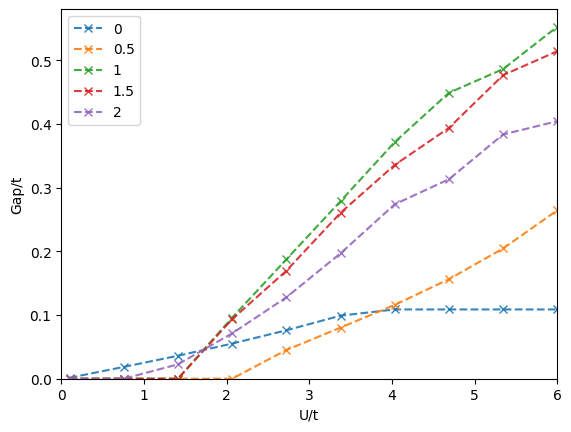

In [46]:
fig, ax= plt.subplots()

for mu in [0, 0.5, 1, 1.5, 2]:
    #print(gap_size_vs_U[f'{mu}'])
    ax.plot(gap_size_vs_U['U'], gap_size_vs_U[f'{mu}'], 'x--', label=f'{mu}', alpha=0.9)

plt.ylim(bottom=0)
plt.xlim(left=0, right=6)
plt.ylabel("Gap/t")
plt.xlabel("U/t")
plt.legend()